<a href="https://colab.research.google.com/github/tmckim/materials-fa23-colab-working/blob/main/lectures/lec08.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Before you start - Save this notebook!

When you open a new Colab notebook from the WebCampus (like you hopefully did for this one), you cannot save changes. So it's  best to store the Colab notebook in your personal drive `"File > Save a copy in drive..."` **before** you do anything else.

The file will open in a new tab in your web browser, and it is automatically named something like: "**Copy of lec08.ipynb**". You can rename this to just the title of the assignment "**lec08.ipynb**". Make sure you do keep an informative name (like the name of the assignment) so that you know which files to submit back to WebCampus for grading! More instructions on this are at the end of the notebook.


**Where does the notebook get saved in Google Drive?**

By default, the notebook will be copied to a folder called “Colab Notebooks” at the root (home directory) of your Google Drive. If you use this for other courses or personal code notebooks, I recommend creating a folder for this course and then moving the assignments AFTER you have completed them.

In [ ]:
# Setup and add files needed to gdrive
# If you restart colab, start by rerunning this cell first!
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

#!mkdir -p '/content/gdrive/My Drive/colab-materials-NS499DataSci-notebooks/'
%cd /content/gdrive/My Drive/colab-materials-NS499DataSci-notebooks/
!rm -r materials-fa23-colab-working

!git clone https://github.com/tmckim/materials-fa23-colab-working '/content/gdrive/My Drive/colab-materials-NS499DataSci-notebooks/materials-fa23-colab-working/'

%cd /content/gdrive/MyDrive/colab-materials-NS499DataSci-notebooks/materials-fa23-colab-working/lectures/

In [1]:
############### TEST
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

%cd /content/gdrive/MyDrive/colab-materials-NS499DataSci-notebooks/materials-fa23-colab-working/lectures/

Mounted at /content/gdrive
/content/gdrive/MyDrive/colab-materials-NS499DataSci-notebooks/materials-fa23-colab-working/lectures


In [2]:
# Import packages and other things needed
# Don't change this cell; Just run this cell
# If you restart colab, make sure to run this cell again after the first one above^

from datascience import *
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')

## Lecture 08 ##

In this lecture we will:
- Demonstrate deterministic and random sampling
- Plot Probability and Empirical Distributions
- Demonstrate the law of large numbers

## Random Sampling ##

We load in a dataset of all United flights national flights from 6/1/15 to 8/9/15, their destination and how long they were delayed, in minutes.

In [ ]:
# columns:
# date
# flight number
# destination
# delay (in minutes)

In [3]:
# Load in our data
united = Table.read_table('united.csv')
united = united.with_column('Row', np.arange(united.num_rows)).move_to_start('Row') # add row numbers so we can see samples more easily
united

Row,Date,Flight Number,Destination,Delay
0,6/1/15,73,HNL,257
1,6/1/15,217,EWR,28
2,6/1/15,237,STL,-3
3,6/1/15,250,SAN,0
4,6/1/15,267,PHL,64
5,6/1/15,273,SEA,-6
6,6/1/15,278,SEA,-8
7,6/1/15,292,EWR,12
8,6/1/15,300,HNL,20
9,6/1/15,317,IND,-10


For each of the following, is this a deterministic or a random sampling strategy?

In [4]:
# Take a sample, like we've been doing already in this class
united.where('Destination', 'JFK')

Row,Date,Flight Number,Destination,Delay
26,6/1/15,502,JFK,-4
33,6/1/15,637,JFK,141
39,6/1/15,704,JFK,-8
50,6/1/15,758,JFK,-5
51,6/1/15,760,JFK,352
56,6/1/15,824,JFK,3
57,6/1/15,898,JFK,290
179,6/2/15,502,JFK,0
188,6/2/15,637,JFK,202
194,6/2/15,704,JFK,-11


In [5]:
# Sampling table method, with replacement
united.sample(3, with_replacement= True)

Row,Date,Flight Number,Destination,Delay
5950,7/10/15,1742,EWR,20
8527,7/27/15,1796,IAD,14
820,6/6/15,1121,PHL,163


In [6]:
# sample using np.arange
united.take(np.arange(0, united.num_rows, 1000))

Row,Date,Flight Number,Destination,Delay
0,6/1/15,73,HNL,257
1000,6/7/15,1692,EWR,7
2000,6/14/15,824,JFK,-1
3000,6/21/15,217,EWR,5
4000,6/27/15,1401,SAN,-4
5000,7/4/15,1614,LAS,-2
6000,7/11/15,401,CLE,4
7000,7/17/15,1645,IAD,0
8000,7/24/15,624,ORD,61
9000,7/30/15,1728,ORD,209


In [7]:
# Sample using take method
united.take(make_array(34, 6321, 10040))

Row,Date,Flight Number,Destination,Delay
34,6/1/15,650,AUS,44
6321,7/13/15,1124,SEA,-7
10040,8/6/15,1216,LAS,2


In [8]:
# combination of methods
united.where('Destination', 'JFK').sample(3,with_replacement= True)

Row,Date,Flight Number,Destination,Delay
6440,7/14/15,502,JFK,151
11561,8/16/15,758,JFK,-6
1400,6/10/15,760,JFK,5


In [9]:
# A systematic sample example
start = np.random.choice(np.arange(1000))
systematic_sample = united.take(np.arange(start, united.num_rows, 1000))
systematic_sample.show()

Row,Date,Flight Number,Destination,Delay
305,6/3/15,317,IND,25
1305,6/9/15,1645,IAD,-6
2305,6/16/15,824,JFK,-2
3305,6/23/15,251,PDX,0
4305,6/29/15,1581,OGG,-7
5305,7/6/15,1748,AUS,83
6305,7/13/15,820,ORD,4
7305,7/19/15,1946,BOS,1
8305,7/26/15,834,DEN,-4
9305,8/1/15,1796,IAD,30


## Distributions ##

In [10]:
# A single, fair die
die = Table().with_column('Face', np.arange(1, 7))
die

Face
1
2
3
4
5
6


What is the **Probability Distribution** of drawing each face assuming each face is equally likely (a 'fair die')?

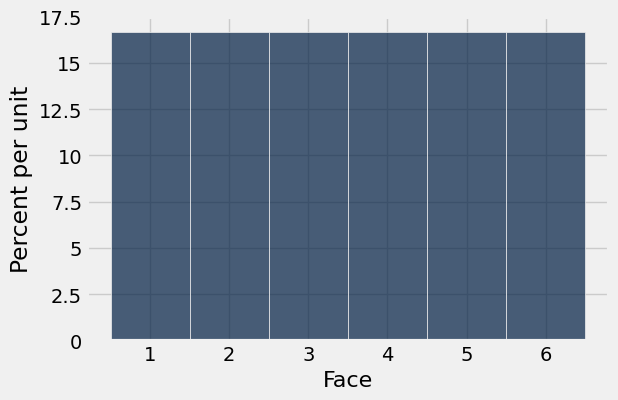

In [14]:
# Probability distribution
roll_bins = np.arange(0.5,6.6,1)
die.hist(bins=roll_bins)

We can sample from the die table many tims with replacement:

In [12]:
die.sample(5)

Face
3
2
5
1
6


We can construct an **Empirical Distribution** from our simulation:

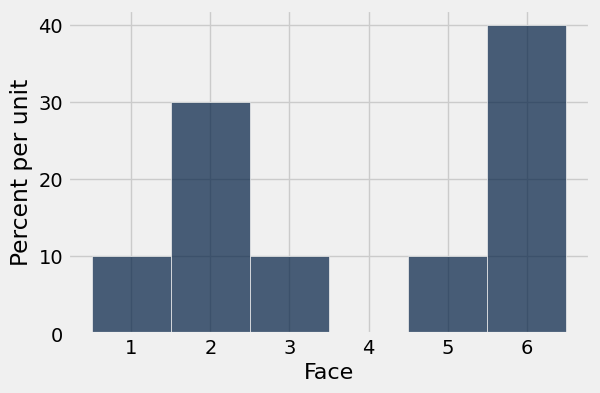

In [21]:
die.sample(10).hist(bins=roll_bins)

What happens if we increase the number of trials in our simulation? What happens to the distribution?

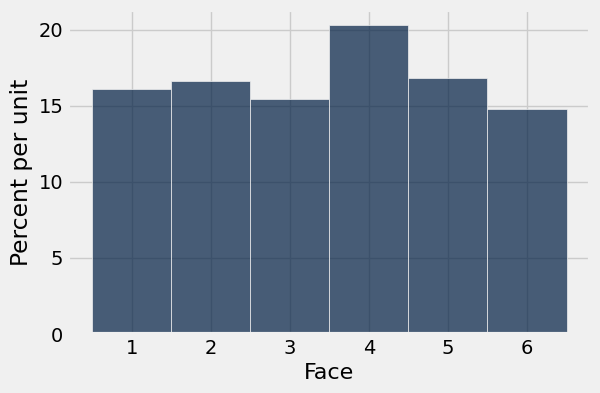

In [23]:
die.sample(1000).hist(bins=roll_bins)

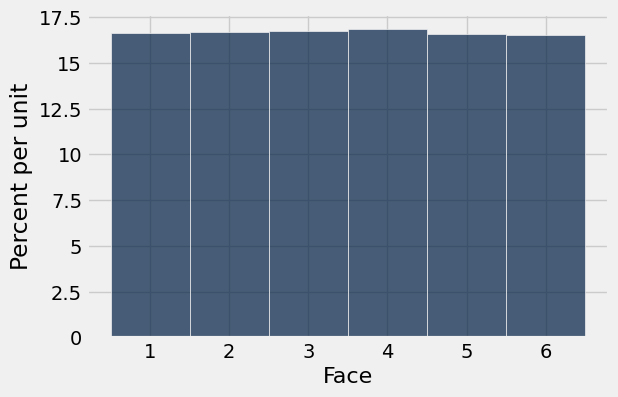

In [24]:
die.sample(100000).hist(bins=roll_bins)

## Large Random Samples ##

The United flight dataset is a relatively large dataset:

In [25]:
# Show how much data
united.num_rows

13825

We can plot the distribution of delays for the population:

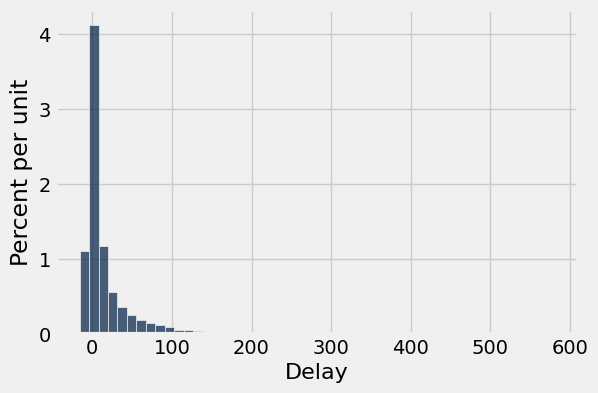

In [26]:
# Some very delayed flights
united.hist('Delay', bins = 50)

In [27]:
united.sort('Delay', descending = True)

Row,Date,Flight Number,Destination,Delay
3140,6/21/15,1964,SEA,580
3154,6/22/15,300,HNL,537
3069,6/21/15,1149,IAD,508
2888,6/20/15,353,ORD,505
12627,8/23/15,1589,ORD,458
7949,7/23/15,1960,LAX,438
3412,6/23/15,1606,ORD,430
578,6/4/15,1743,LAX,408
2474,6/17/15,1122,HNL,405
8426,7/27/15,572,ORD,385


Let's truncate the extreme flights with a histogram from -20 to 201. (More on why later)

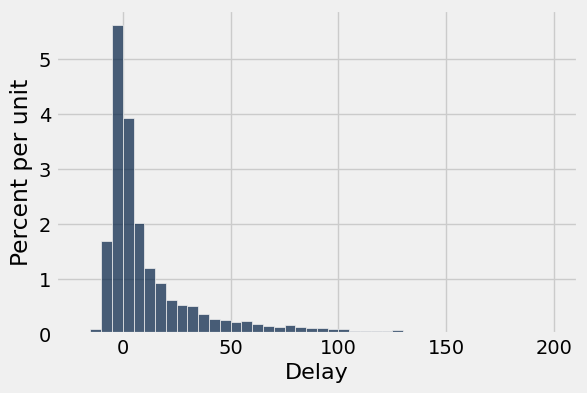

In [28]:
# Show the adjusted histogram
united_bins = np.arange(-20,201,5) # -20 means left early, and then up to 5 mins
united.hist('Delay', bins = united_bins)

What happens if we take a small sample from this population of flights and compute the distribution of delays:

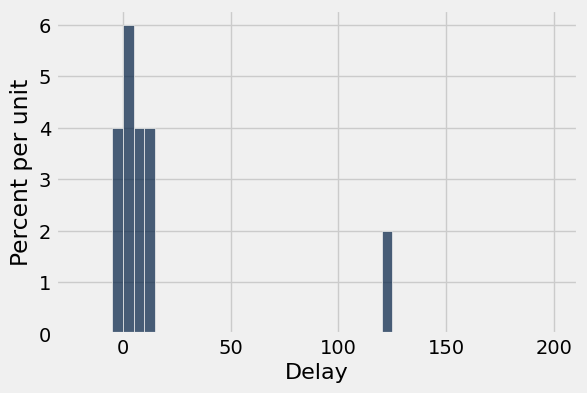

In [31]:
united.sample(10).hist('Delay', bins = united_bins)

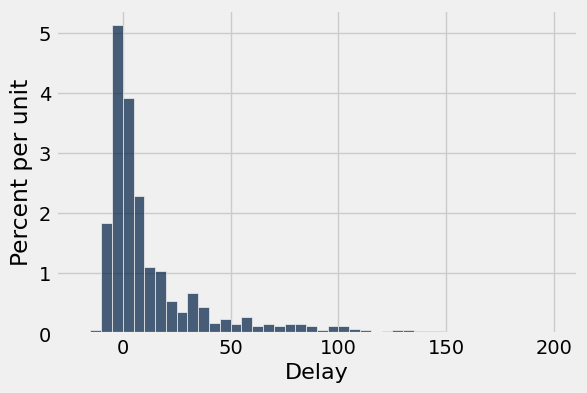

In [32]:
# Increase the sample size
united.sample(1000).hist('Delay', bins = united_bins)

## Simulating Statistics ##

Because we have access to the population (this is rare!) we can compute the parameters directly from the data. For example, suppose we wanted to know the median flight delay:

In [33]:
np.median(united.column('Delay'))

2.0

In practice, we will often have a sample. The median of the sample is a statistic that estimates the median of the population.

In [35]:
np.median(united.sample(10).column('Delay'))

4.5

Here we define a function to simulate the process of computing the median from a random sample of a given size:

In [36]:
def sample_median(size):
    return np.median(united.sample(size).column('Delay'))

In [39]:
sample_median(10)

1.5

We can then simulate this sampling process many times:

In [83]:
sample_medians = make_array()

for i in np.arange(1000):
    new_median = sample_median(10)
    sample_medians = np.append(sample_medians, new_median)

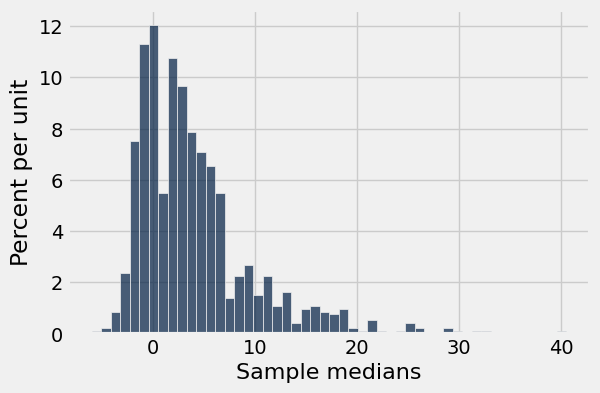

In [84]:
medians = Table().with_columns('Sample medians', sample_medians, 'Sample size', 10)
medians.hist('Sample medians', bins = 50)

In [85]:
sample_medians2 = make_array()

for i in np.arange(1000):
    new_median = sample_median(1000)
    sample_medians2 = np.append(sample_medians2, new_median)

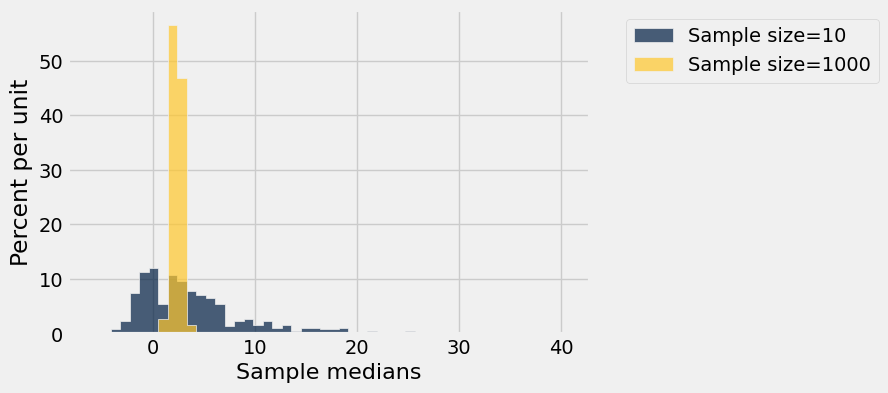

In [86]:
# Combine both samples into a table and plot
overall_tbl = medians.append(Table().with_columns(
    "Sample medians", sample_medians2,
    "Sample size", 1000))
overall_tbl.hist("Sample medians", group="Sample size", bins = 50)

#### Empirical Distributions of a Statistic (Overlayed)

In [ ]:
sample_medians_10 = make_array()
sample_medians_100 = make_array()
sample_medians_1000 = make_array()

num_simulations = 2000

for i in np.arange(num_simulations):
    new_median_10 = sample_median(10)
    sample_medians_10 = np.append(sample_medians_10, new_median_10)
    new_median_100 = sample_median(100)
    sample_medians_100 = np.append(sample_medians_100, new_median_100)
    new_median_1000 = sample_median(1000)
    sample_medians_1000 = np.append(sample_medians_1000, new_median_1000)

In [ ]:
sample_medians = Table().with_columns('Size 10', sample_medians_10, 
                                      'Size 100', sample_medians_100,
                                      'Size 1000', sample_medians_1000)

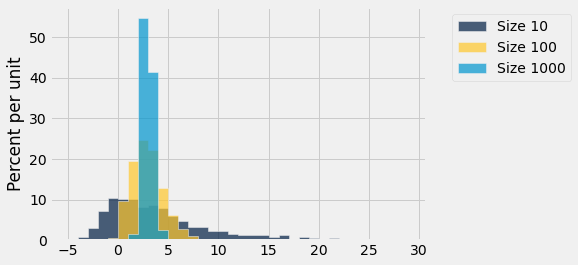

In [ ]:
sample_medians.hist(bins = np.arange(-5, 30))

## Mendel and Pea Flowers ##

In [ ]:
## Mendel had 929 plants, of which 709 had purple flowers
observed_purples = 709 / 929
observed_purples

0.7631862217438106

In [ ]:
predicted_proportions = make_array(.75, .25)
sample_proportions(929, predicted_proportions)

array([0.7416577, 0.2583423])

In [ ]:
def purple_flowers():
    return sample_proportions(929, predicted_proportions).item(0) * 100

In [ ]:
purple_flowers()

74.59634015069967

In [ ]:
purples = make_array()

for i in np.arange(10000):
    new_purple = purple_flowers()
    purples = np.append(purples, new_purple)

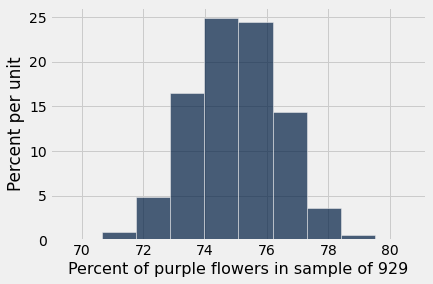

In [ ]:
Table().with_column('Percent of purple flowers in sample of 929', purples).hist()

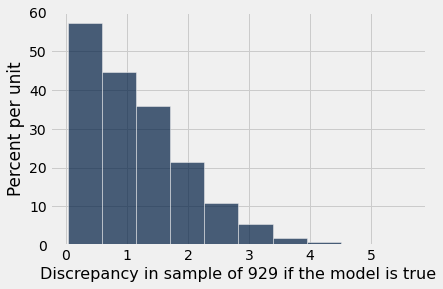

In [ ]:
Table().with_column('Discrepancy in sample of 929 if the model is true', abs(purples- 75)).hist()

In [ ]:
abs(observed_purples * 100 - 75)

1.318622174381062

## Swain vs. Alabama ##

In [ ]:
population_proportions = make_array(.26, .74)
population_proportions

array([0.26, 0.74])

In [ ]:
sample_proportions(100, population_proportions)

array([0.22, 0.78])

In [ ]:
def panel_proportion():
    return sample_proportions(100, population_proportions).item(0)

In [ ]:
panel_proportion()

0.26

In [ ]:
panels = make_array()

for i in np.arange(10000):
    new_panel = panel_proportion() * 100
    panels = np.append(panels, new_panel)

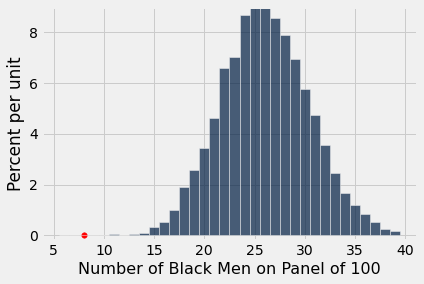

In [ ]:
Table().with_column(
    'Number of Black Men on Panel of 100', panels
).hist(bins=np.arange(5.5,40.))

# Plotting details; ignore this code
plots.ylim(-0.002, 0.09)
plots.scatter(8, 0, color='red', s=30);